In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/data_digits.csv')
Y = data['label']
X = data.drop('label', axis = 1)
#X = data.drop('Unnamed: 0', axis = 1)
del X['Unnamed: 0']
print(np.shape(X), np.shape(Y))

(4200, 784) (4200,)


In [3]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.5)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
k = np.arange(1,11,1)
f1_score_test = []
for i in k:
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic',hidden_layer_sizes=(i))
    mlp.fit(x_train, y_train)
    f1_score_test.append(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))

In [25]:
C = 10
clf = LogisticRegression(C = C, penalty = 'l1',solver = 'saga')
clf.fit(x_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

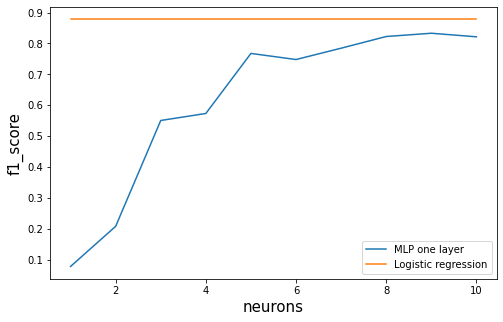

In [33]:
plt.figure(figsize=(8,5))
plt.plot(k, f1_score_test,label = 'MLP one layer')
plt.plot(k, np.full(len(k), clf.score(x_test, y_test)),label = 'Logistic regression')
plt.xlabel('neurons',fontsize=15)
plt.ylabel('f1_score',fontsize=15)
plt.legend()
#plt.savefig('loss_f1.png')
plt.show()

In [14]:
k1 = np.arange(1,6,1)
k2 = np.arange(2,11,1)
f1_2layer = np.ones((len(k1), len(k2)))
for i in k1:
    for j in k2:
        mlp = sklearn.neural_network.MLPClassifier(activation='logistic',hidden_layer_sizes=(i,j))
        mlp.fit(x_train, y_train)
        f1_2layer[i-1,j-2] = sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro')

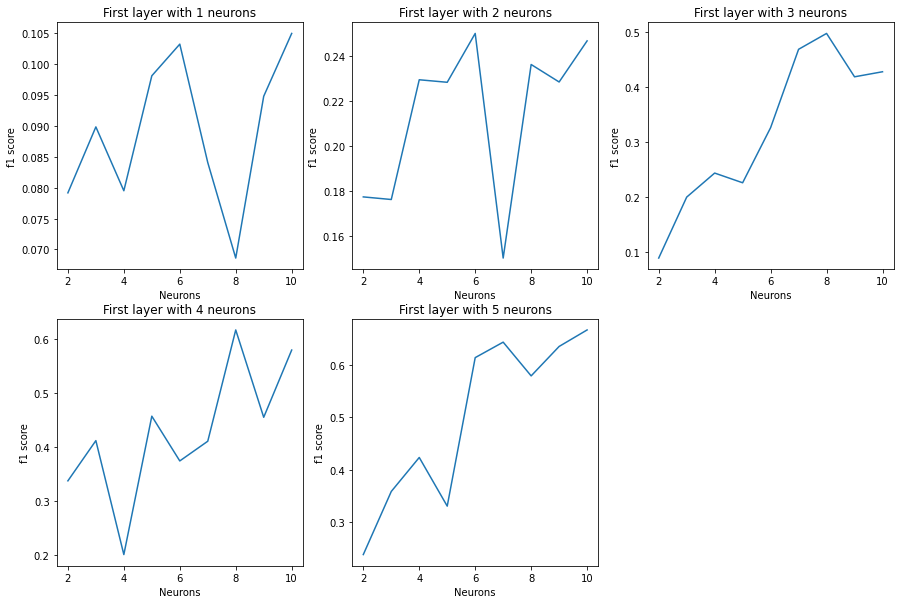

In [23]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(k2,f1_2layer[i])
    plt.title('First layer with ' + str(i+1) + ' neurons')
    plt.xlabel('Neurons')
    plt.ylabel('f1 score')

In [ ]:
#Donde se obtiene el mejor score para las dos capas es con la primera capa de 5 neuronas y la segunda con 
#10 neuronas.

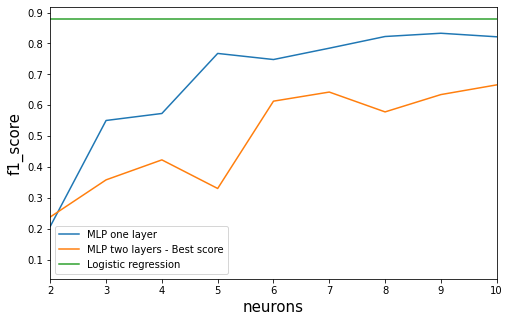

In [40]:
plt.figure(figsize=(8,5))
plt.plot(k, f1_score_test,label = 'MLP one layer')
plt.plot(k2, f1_2layer[4,:], label = 'MLP two layers - Best score')
plt.plot(k2, np.full(len(k2), clf.score(x_test, y_test)), label = 'Logistic regression')
plt.xlabel('neurons',fontsize=15)
plt.ylabel('f1_score',fontsize=15)
plt.legend()
plt.xlim(2,10)
#plt.savefig('loss_f1.png')
plt.show()

In [ ]:
#De acuerdo a la gráfica anterior, ninguna red dió mejor que la regresión logística. Si bien en el caso de una 
#sola capa el score se acerca a la regresión, no lo sobrepasa. Para dos capas aunque el score aumenta, no logra
#sobrepasar al score de una sola capa.

In [41]:
#plt.figure(figsize=(15,15))
#plt.suptitle('Loss = {:.5f} f1_score =  {:.5f}'.format(loss, f1),fontsize=15)
#for i in range(n):
#    plt.subplot(4,4,i+1)
#    scale = np.max(mlp.coefs_[0])
#    plt.title('Neuron ' + str(i+1))
#    plt.imshow(mlp.coefs_[1][:,i].reshape(28,28), cmap=plt.cm.RdBu,vmin=-scale, vmax=scale)
#plt.savefig('neuronas.png')